In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML,Image
import seaborn as sns
import time 

%matplotlib inline
plt.style.use('seaborn-white')

# 算法流程

## 目标函数(object function)

$$
L(x)=\exp(x_1+3x_2-0.1)+\exp(x_1-3x_2-0.1)+\exp(-x_1-0.1)
$$

## 梯度计算 (compute gradient)

$$
\begin{align}
\frac{\partial L}{\partial x_1}&=\exp(x_1+3x_2-0.1)+\exp(x_1-3x_2-0.1)-\exp(-x_1-0.1) \\
\frac{\partial L}{\partial x_2}&=3\exp(x_1+3x_2-0.1)-3\exp(x_1-3x_2-0.1)
\end{align}
$$

## 最速下降（quadratic norm）

* given a start point $x \in dom L$,choose matrix $P$
* repeat
    * compute gradient $\nabla L(x)$
    * compute steepest descent direction $\Delta x_{sd}=-P^{-1}\nabla L(x)$
    * line search: choose learning rate $t$
    * update: $x:=x+t\Delta x_{sd}$
* until convergence

## 回溯直线搜索(line search)
* initialize $\alpha \in (0,0.5] $,$\beta \in [0,1]$,$t=1$
* while $L(x+t\Delta x_{sd})>L(x)+\alpha t\nabla L(x)^T\Delta x_{sd}$
    * $t:=\beta t$
* end

# 代码实现

## 函数的定义

In [2]:
# object function
def L(x1,x2):
    return np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)

In [3]:
# compute gradient
def compute_grad(x1,x2):
    g1=np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)-np.exp(-x1-0.1)
    g2=3.0*np.exp(x1+3*x2-0.1)-3.0*np.exp(x1-3.0*x2-0.1)
    return np.array([g1,g2])

In [4]:
# line search
def condition(x,delta,g,t,alpha):
    temp=x+t*delta
    left=L(temp[0],temp[1])
    right=L(x[0],x[1])+alpha*t*np.dot(g,delta)
    return left>right 

def linesearch(x,g,delta,beta,alpha):
    t=1
    while condition(x,delta,g,t,alpha):
        t=beta*t
    return t
    

In [5]:
# steepest descent
def steepest(x,P,optimal_val,alpha,beta,Loss_history,x_history,y_history):
    loss=0.0
    step=0
    while np.abs(loss-optimal_val)>=1e-8: # 收敛条件
        g=compute_grad(x[0],x[1])
        delta=-np.linalg.inv(P).dot(g)
        loss=L(x[0],x[1])
        Loss_history.append(loss)
        print("第{}轮:Loss:{}".format(step,loss))
        
        lr=linesearch(x,g,delta,beta,alpha)
        step+=1
        x+=lr*delta
        
        x_history.append(x[0])
        y_history.append(x[1])

In [6]:
# 初始化参数
x_0=np.array([1.5,-1.1])

## 最优值$p^*$

In [7]:
# 先用RMSProp寻找到最优值p*,为后面的验证实验所用 
# start point
x_1=x_0.copy()
# 超参数 [0.9,0.99,0.999]
decay_rate=0.9
cache=np.zeros(2)
# 数值上防止分母为0
eps=1e-8
learning_rate=0.05
# 记录历史数值，为以后的可视化用
Loss_1,a1_history,b1_history=[],[x_1[0]],[x_1[1]]
# 迭代次数
iteration=150
# 记录运行时间
startTime=time.time()

for t in range(iteration):
    g=compute_grad(x_1[0],x_1[1])
    loss=L(x_1[0],x_1[1])
    Loss_1.append(loss)
    if t%10==0:
        print("第{}轮,Loss:{}".format(t,loss))
        
    cache=decay_rate*cache+(1-decay_rate)*np.square(g)
    x_1-=learning_rate*g /(np.sqrt(cache)+eps)
    
    a1_history.append(x_1[0])
    b1_history.append(x_1[1])

Loss_1.append(L(x_1[0],x_1[1]))
print('运行时长{} sec(s)'.format(time.time()-startTime))

第0轮,Loss:110.2986375893409
第10轮,Loss:14.657838241267232
第20轮,Loss:7.471903727682384
第30轮,Loss:4.854062749418031
第40轮,Loss:3.684256004110696
第50轮,Loss:3.1115100867923675
第60轮,Loss:2.801231783934415
第70轮,Loss:2.6356693196903223
第80轮,Loss:2.571738129366431
第90轮,Loss:2.5598461467083244
第100轮,Loss:2.5592690846126462
第110轮,Loss:2.559266696724308
第120轮,Loss:2.5592666966582156
第130轮,Loss:2.5592666966582156
第140轮,Loss:2.5592666966582156
运行时长0.005002260208129883 sec(s)


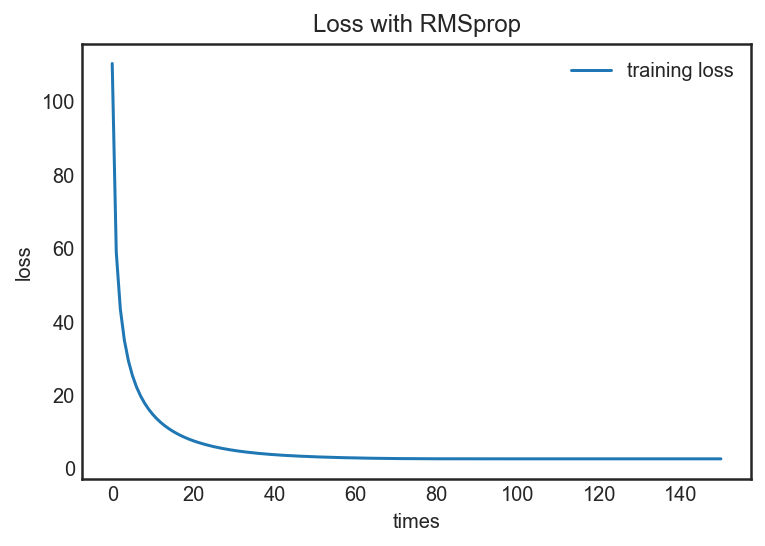

In [8]:
%config InlineBackend.figure_format='retina'
plt.plot(Loss_1,label='training loss')
plt.title('Loss with RMSprop')
plt.xlabel('times')
plt.ylabel('loss')
plt.legend()


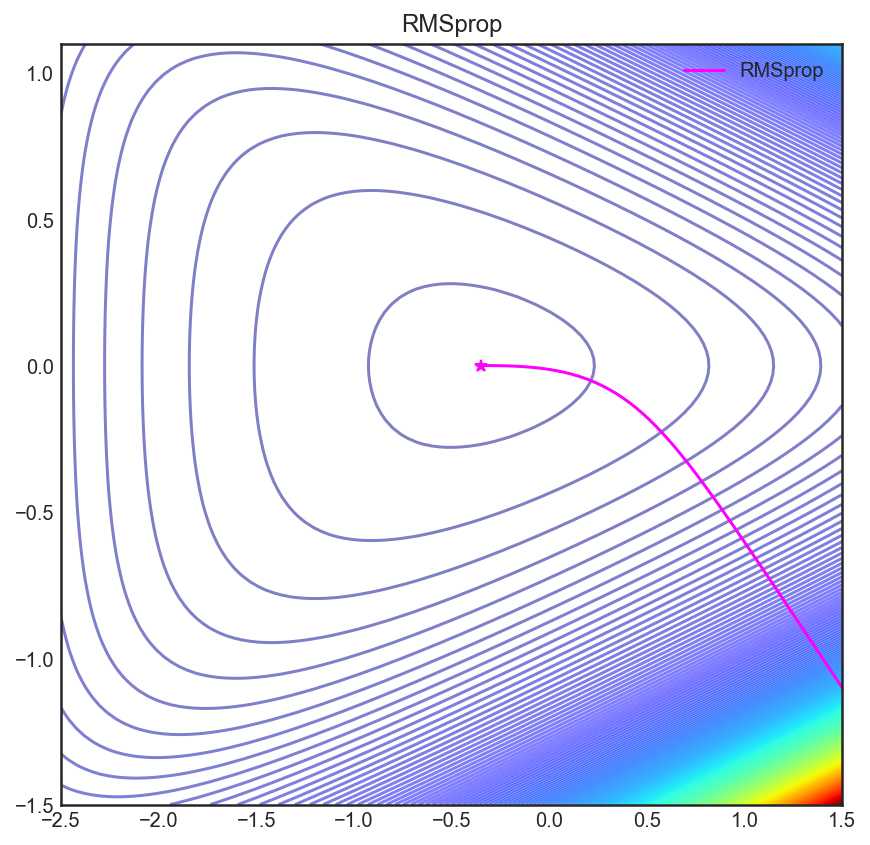

In [9]:
# 可视化
x,y=np.linspace(-2.5,1.5,100),np.linspace(-1.5,1.1,100)
X,Y=np.meshgrid(x,y)
l=L(X,Y)
fig1,ax1=plt.subplots(figsize=(7,7))
ax1.contour(X,Y,l,250,cmap='jet',alpha=0.5)
ax1.plot(a1_history,b1_history,'magenta',label='RMSprop',lw=1.5)
ax1.plot(a1_history[-1],b1_history[-1],'*',color='magenta',markersize=6)
plt.title('RMSprop')
plt.legend()

$p^*=2.5592666966582156$

In [10]:
optimal_val=Loss_1[-1]
optimal_val

2.5592666966582156

## 验证部分
### (1) P的选择

$$
P=
\begin{bmatrix}
2 & 0 \\
0 & 8
\end{bmatrix}
or
\begin{bmatrix}
8 & 0 \\
0 & 2
\end{bmatrix}
$$

In [11]:
alpha,beta=0.5,0.8


第0轮:Loss:110.2986375893409
第1轮:Loss:30.013640056379245
第2轮:Loss:8.59421439206315
第3轮:Loss:3.4690257601691976
第4轮:Loss:2.6571941838349162
第5轮:Loss:2.5620525518793507
第6轮:Loss:2.5593553639676285
第7轮:Loss:2.559269600186121
第8轮:Loss:2.5592667918070147
第9轮:Loss:2.559266699776521
运行时间:{}sec(s) 0.006972789764404297


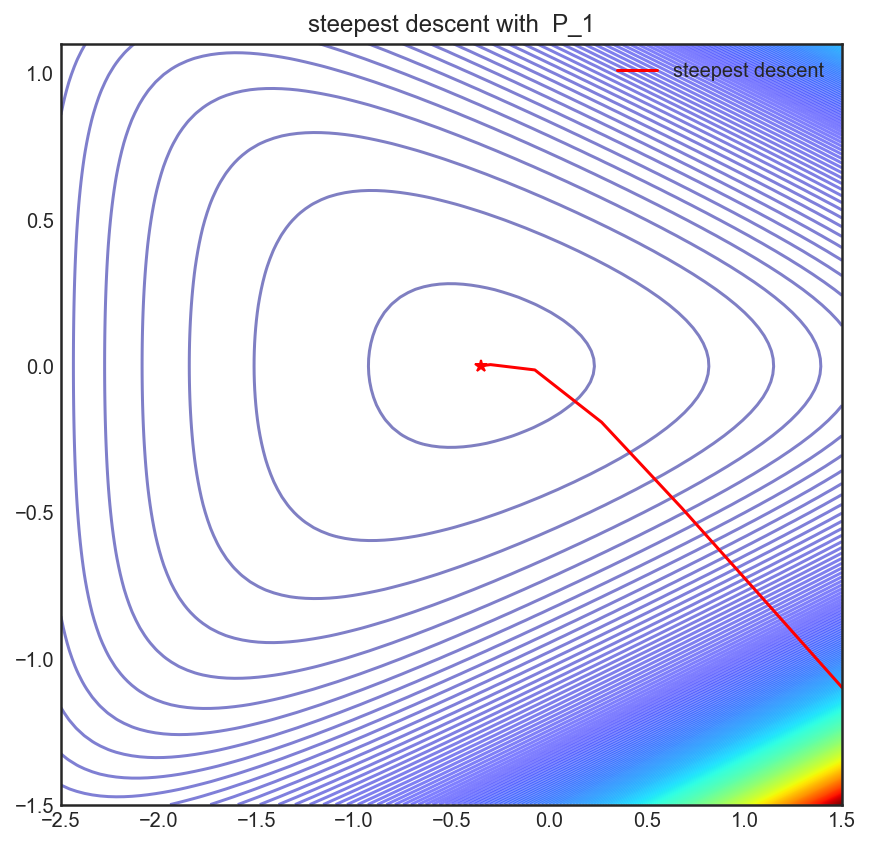

In [12]:
#运行时间
startTime=time.time()

P=np.array([[2,0],[0,8]])
x_2=x_0.copy()
loss_2,a2_history,b2_history=[],[x_2[0]],[x_2[1]]
steepest(x_2,P,optimal_val,alpha,beta,loss_2,a2_history,b2_history)
loss_2.append(L(x_2[0],x_2[1]))
print("运行时间:{}sec(s)",format(time.time()-startTime))
fig2,ax2=plt.subplots(figsize=(7,7))
ax2.contour(X,Y,l,250,cmap='jet',alpha=0.5)
ax2.plot(a2_history,b2_history,'red',label='steepest descent',lw=1.5)
ax2.plot(a2_history[-1],b2_history[-1],'*',color='red',markersize=6)
plt.title('steepest descent with  P_1')
plt.legend()

第0轮:Loss:110.2986375893409
第1轮:Loss:24.542458934837875
第2轮:Loss:9.177617624920112
第3轮:Loss:7.51203469973362
第4轮:Loss:3.6409366725852705
第5轮:Loss:3.493385866784929
第6轮:Loss:3.2157923683581724
第7轮:Loss:3.0658969066332706
第8轮:Loss:2.7950469964730016
第9轮:Loss:2.7566932391681065
第10轮:Loss:2.6739894373553907
第11轮:Loss:2.639680505219266
第12轮:Loss:2.596079828281874
第13轮:Loss:2.5790244482624676
第14轮:Loss:2.5743851896365837
第15轮:Loss:2.566808840829111
第16轮:Loss:2.565377390738795
第17轮:Loss:2.5634040695499563
第18轮:Loss:2.5622660277795353
第19轮:Loss:2.5606588798240226
第20轮:Loss:2.5600456097973927
第21轮:Loss:2.559832064473344
第22轮:Loss:2.559677168451981
第23轮:Loss:2.5595766003285223
第24轮:Loss:2.5594769722309816
第25轮:Loss:2.5594188479926525
第26轮:Loss:2.559337540786589
第27轮:Loss:2.5593103183685995
第28轮:Loss:2.559295846779657
第29轮:Loss:2.5592803882680006
第30轮:Loss:2.5592767718579275
第31轮:Loss:2.559274183921147
第32轮:Loss:2.5592717046789106
第33轮:Loss:2.559270310713498
第34轮:Loss:2.5592691932480385
第35轮:Loss:

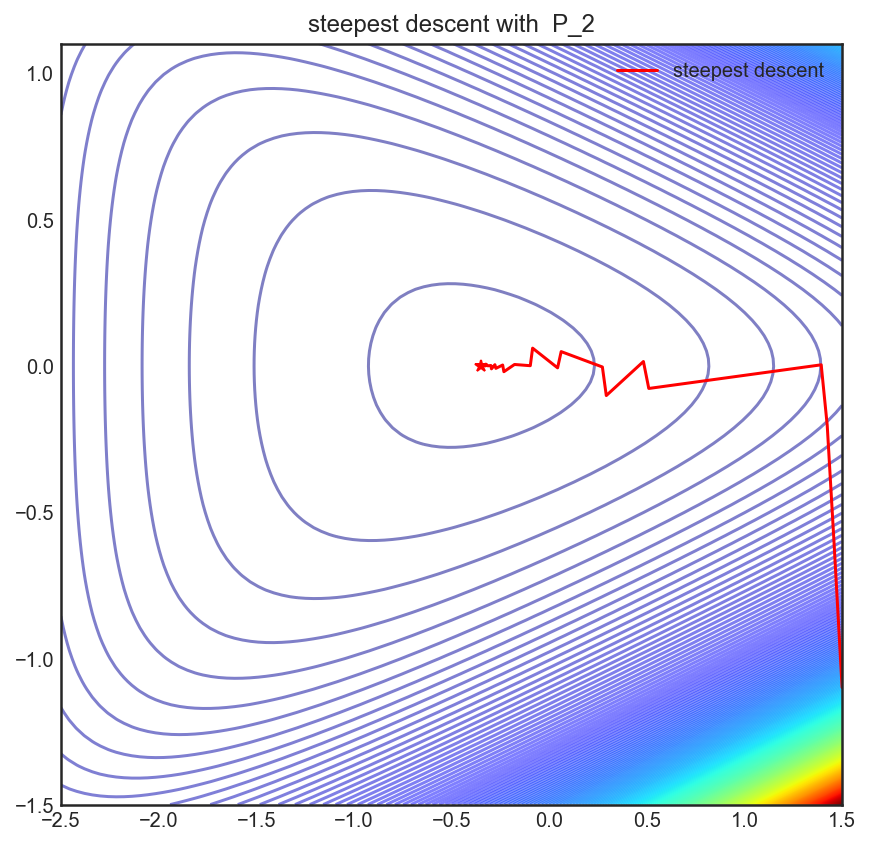

In [13]:
# 
startTime=time.time()

P=np.array([[8,0],[0,2]])
x_3=x_0.copy()
loss_3,a3_history,b3_history=[],[x_3[0]],[x_3[1]]
steepest(x_3,P,optimal_val,alpha,beta,loss_3,a3_history,b3_history)
loss_3.append(L(x_3[0],x_3[1]))
print("运行时间{}sec(s)".format(time.time()-startTime))


fig3,ax3=plt.subplots(figsize=(7,7))
ax3.contour(X,Y,l,250,cmap='jet',alpha=0.5)
ax3.plot(a3_history,b3_history,'red',label='steepest descent',lw=1.5)
ax3.plot(a3_history[-1],b3_history[-1],'*',color='red',markersize=6)
plt.title('steepest descent with  P_2')
plt.legend()